In [18]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
G = load_graph("montgomery")
print(G.size())

G_node = len(G.nodes)

648667


In [6]:
I = set()
#with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
#    j = json.load(infile)
    #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    #infected_queue = [set(s) for s in infected_queue]
    #I = I.union(*infected_queue)
    #I = list(I)

infected_size = 1000

nodeList = list(G.nodes)

I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I

I_q = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S_q = set(G.nodes) - I_q

In [7]:
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 2000, 1, 1, 0, .8, .8)

In [8]:
#to_quarantine = DegGreedy(state)
#state.step(to_quarantine)
state.step(set())

V1_k = state.SIR_known.V1
V1_r = state.SIR_real.V1

V2_k = state.SIR_known.V2
V2_r = state.SIR_real.V2

I_k = set(state.SIR_known.SIR.I)
I_r = set(state.SIR_real.SIR.I)

print("No Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_k.intersection(V1_r))) + "\t" + str(len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))) + "\t" + str(len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r)))+ "\t" + str(len(I_k.union(I_r))))
print("-----Ratio------")
print("V1:   " + str(len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r))/len(I_k.union(I_r))))
print("---Known Size----Real Size---")
print("V1:   " + str(len(V1_k)) + "\t" + str(len(V1_r)))
print("V2:   " + str(len(V2_k)) + "\t" + str(len(V2_r)))
print("I:   " + str(len(I_k)) + "\t" + str(len(I_r)))

No Quarantine Graph First Run
--Intersection-----Union---
V1:   30354	43203
V2:   11378	24650
I:   11453	14330
-----Ratio------
V1:   0.7025900979098674
V2:   0.4615821501014199
I:   0.7992323796231682
---Known Size----Real Size---
V1:   32602	40955
V2:   21951	14077
I:   11453	14330


In [9]:
state_q = SimulationState(G, (list(S_q), list(I_q), []), (list(S_q), list(I_q), []), 2000, 1, 1, 0, .8, .8)
to_quarantine = DepRound(state_q)
state.step(to_quarantine)

V1_kq = state_q.SIR_known.V1
V1_rq = state_q.SIR_real.V1

V2_kq = state_q.SIR_known.V2
V2_rq = state_q.SIR_real.V2

I_kq = set(state_q.SIR_known.SIR.I)
I_rq = set(state_q.SIR_real.SIR.I)

print("Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))) + "\t" + str(len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))) + "\t" + str(len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq)))+ "\t" + str(len(I_kq.union(I_rq))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq))))
print("-----Size-------")
print("V1:   " + str(len(V1_kq)) + "\t" + str(len(V1_rq)))
print("V2:   " + str(len(V2_kq)) + "\t" + str(len(V2_rq)))
print("I:   " + str(len(I_kq)) + "\t" + str(len(I_rq)))

Quarantine Graph First Run
--Intersection-----Union---
V1:   11157	13963
V2:   34913	43778
I:   997	997
-----Ratio------
V1:   0.7990403208479553
V2:   0.7975010279135639
I:   1.0
-----Size-------
V1:   11157	13963
V2:   37643	41048
I:   997	997


In [10]:
tree = nx.random_tree(G_node)
I_t = {random.randint(0, G_node-1) for i in range(0, infected_size)}
S_t = set(tree.nodes) - I_t
state_t = SimulationState(tree, (list(S_t), list(I_t), []), (list(S_t), list(I_t), []), 2000, 1, 1, 0, .8, .8)
#transmission too low --> infection never ends up spreading

In [11]:
to_quarantine = DepRound(state_t)
state_t.step(to_quarantine)

V1_kt = state_t.SIR_known.V1
V1_rt = state_t.SIR_real.V1

V2_kt = state_t.SIR_known.V2
V2_rt = state_t.SIR_real.V2

I_kt = set(state_t.SIR_known.SIR.I)
I_rt = set(state_t.SIR_real.SIR.I)

print("Tree Graph (w/ Quarantine) First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))) + "\t" + str(len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))) + "\t" + str(len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt)))+ "\t" + str(len(I_kt.union(I_rt))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))))
print("-----Size-------")
print("V1:   " + str(len(V1_kt)) + "\t" + str(len(V1_rt)))
print("V2:   " + str(len(V2_kt)) + "\t" + str(len(V2_rt)))
print("I:   " + str(len(I_kt)) + "\t" + str(len(I_rt)))

Tree Graph (w/ Quarantine) First Run
--Intersection-----Union---
V1:   104	692
V2:   147	878
I:   449	828
-----Ratio------
V1:   0.15028901734104047
V2:   0.1674259681093394
I:   0.5422705314009661
-----Size-------
V1:   104	692
V2:   147	878
I:   449	828


In [12]:
timestep_dict = {}
print("W/o Quarantine: "+ str(len(V2_r)))
print("With Quarantine: " + str(len(V2_rq)))
print("Tree: " + str(len(V2_rt)))

#timestep_dict[0] = [len(V2_k.intersection(V2_r))]
timestep_dict[0] = [len(V2_k.intersection(V2_r)), len(V2_kq.intersection(V2_rq)), len(V2_kt.intersection(V2_rt)), 
                    len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r)), len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r)),
                    len(I_k.intersection(I_r))/len(I_kt.union(I_r)), len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq)),
                    len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq)), len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq)),
                    len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt)), len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt)),
                    len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))]

V2_r -= V2_k
V2_rq -= V2_kq
V2_rt -= V2_kt

print(timestep_dict)

W/o Quarantine: 14077
With Quarantine: 41048
Tree: 878
{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661]}


In [13]:
for t in range(1, 6):
    state.step(set())
    
    to_quarantine = DepRound(state_q)
    state_q.step(to_quarantine)
    
    to_quarantine_t = DepRound(state_t)
    state_t.step(to_quarantine_t)
    
    V2_k_trial = state.SIR_known.V2
    V2_kq_trial = state_q.SIR_known.V2
    V2_kt_trial = state_t.SIR_known.V2
    
    #coverage of nodes in V2 from first timestep
    V2_intersect = len(V2_k_trial.intersection(V2_r))
    V2_qintersect = len(V2_kq_trial.intersection(V2_rq))
    V2_tintersect = len(V2_kt_trial.intersection(V2_rt))
    
    V2_r -= V2_k_trial
    V2_rq -= V2_kq_trial
    V2_rt -= V2_kt_trial
    
    #STATE w/o QUARANTINE
    V1_k = state.SIR_known.V1
    V1_r_i = state.SIR_real.V1
    V2_r_i = state.SIR_real.V2
    I_k = set(state.SIR_known.SIR.I)
    I_r_i = set(state.SIR_real.SIR.I)
    
    V1_ratio = len(V1_k.intersection(V1_r_i))/max(len(V1_k.union(V1_r_i)), 1)
    V2_ratio = len(V2_k_trial.intersection(V2_r_i))/max(len(V2_k_trial.union(V2_r_i)), 1)
    I_ratio = len(I_k.intersection(I_r_i))/max(len(I_k.union(I_r_i)), 1)
    
    #STATE w/ QUARANTINE
    V1_kq = state_q.SIR_known.V1
    V1_rq_i = state_q.SIR_real.V1
    V2_rq_i = state_q.SIR_real.V2
    I_kq = set(state_q.SIR_known.SIR.I)
    I_rq_i = set(state_q.SIR_real.SIR.I)
    
    V1_q_ratio = len(V1_kq.intersection(V1_rq_i))/max(1, len(V1_kq.union(V1_rq_i)))
    V2_q_ratio = len(V2_kq_trial.intersection(V2_rq_i))/max(1, len(V2_kq_trial.union(V2_rq_i)))
    I_q_ratio = len(I_kq.intersection(I_rq_i))/max(1, len(I_kq.union(I_rq_i)))
    
    #TREE
    V1_kt = state_t.SIR_known.V1
    V1_rt_i = state_t.SIR_real.V1
    V2_rt_i = state_t.SIR_real.V2
    I_kt = set(state_t.SIR_known.SIR.I)
    I_rt_i = set(state_t.SIR_real.SIR.I)
    
    V1_t_ratio = len(V1_kt.intersection(V1_rt_i))/max(1, len(V1_kt.union(V1_rt_i)))
    V2_t_ratio = len(V2_kt_trial.intersection(V2_rt_i))/max(1, len(V2_kt_trial.union(V2_rt_i)))
    I_t_ratio = len(I_kt.intersection(I_rt_i))/max(1, len(I_kt.union(I_rt_i)))
    
    timestep_dict[t] = [V2_intersect, V2_qintersect, V2_tintersect, V1_ratio, V2_ratio, I_ratio, V1_q_ratio, V2_q_ratio,
                       I_q_ratio, V1_t_ratio, V2_t_ratio, I_t_ratio]

print(len(V2_r), len(V2_rq), len(V2_rt))

2292 1638 731


In [14]:
print(timestep_dict)
#arr = [v[0] for k,v in timestep_dict.items()]
#arr_q = [v[1] for k,v in timestep_dict.items()]
#df = pd.DataFrame([arr, arr_q], columns = ["Without Quarantine", "With Quarantine"])
df = pd.DataFrame.from_dict(timestep_dict, orient='index', columns = ["Without Quarantine Coverage", "With Quarantine Coverage", "Tree Coverage",
                                                                     "V1 Ratio", "V2 Ratio", "I Ratio", "V1_q Ratio", "V2_q Ratio", "I_q Ratio",
                                                                     "V1_t Ratio", "V2_t Ratio", "I_t Ratio"])
print(df)

{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661], 1: [383, 4189, 0, 0.16239687364307426, 0.017666608361028513, 0.7066127634998556, 0.5574911901784699, 0.46818344465648853, 0.7654434506394717, 0.0014084507042253522, 0.0, 0.036065573770491806], 2: [24, 258, 0, 0.17781690140845072, 0.018612521150592216, 0.6111111111111112, 0.35474482198456747, 0.13374109338545936, 0.5696729181335211, 0.0, 0.0, 0.0], 3: [0, 50, 0, 0.375, 0.2222222222222222, 0.517948717948718, 0.10328875431070737, 0.010530459600433029, 0.5188052489979685, 0.0, 0.0, 0.0], 4: [0, 0, 0, 0.3333333333333333, 0.0, 0.46153846153846156, 0.09114927344782034, 0.015166835187057633, 0.34102189781021897, 0.0, 0.0, 0.0], 5: [0, 0, 0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.13895781637717122, 0.0, 0.0, 0.0]}
   Without Quarantine Coverage  With Quarantine Coverage  Tree Coverage  \
0                        11378 

<AxesSubplot:>

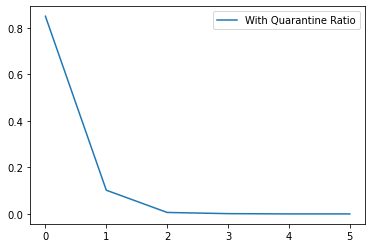

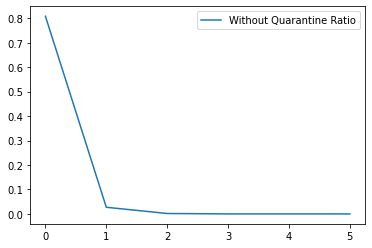

In [21]:
df["Without Quarantine Ratio"] = df["Without Quarantine Coverage"].apply(lambda x: x/14077)
df["With Quarantine Ratio"] = df["With Quarantine Coverage"].apply(lambda x: x/41048)
df.plot(y = "With Quarantine Ratio")
df.plot(y = "Without Quarantine Ratio")

   V1_q Ratio  V1_t Ratio
0    0.799040    0.150289
1    0.557491    0.001408
2    0.354745    0.000000
3    0.103289    0.000000
4    0.091149    0.000000
5    0.000000    0.000000


<AxesSubplot:>

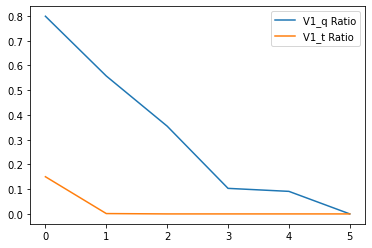

In [31]:
df_sub = df[["V1_q Ratio", "V1_t Ratio"]]
print(df_sub)
df_sub.plot()
#df.plot(y = "V1_q Ratio", "V1_t Ratio")
#df.plot(y = "V1_t Ratio")

<AxesSubplot:>

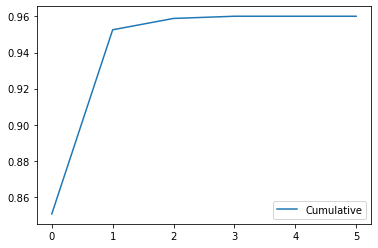

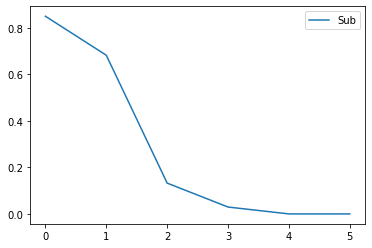

In [39]:
#CUMULATIVE is the total coverage of original V2
#SUB is the coverage of remaining uncovered per timestep

df.loc[0, 'Cumulative'] = df.loc[0, 'With Quarantine Coverage']/41048
df.loc[0, 'Sub'] = df.loc[0, 'With Quarantine Coverage']/41048
cout = 41048
for i in range(1, len(df)):
    df.loc[i, 'Cumulative'] = df.loc[i-1, 'Cumulative'] + df.loc[i, "With Quarantine Coverage"]/(41048)
    cout -= df.loc[i-1, "With Quarantine Coverage"]
    df.loc[i, "Sub"] = df.loc[i, "With Quarantine Coverage"]/( cout)

df.plot(y = "Cumulative")
df.plot(y = "Sub")

<AxesSubplot:>

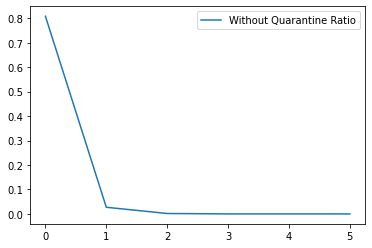

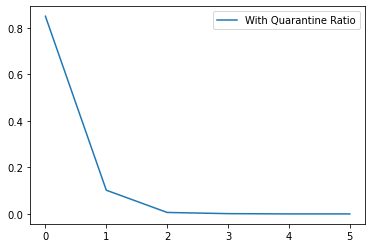

In [32]:
df.plot(y = "Without Quarantine Ratio")
df.plot(y = "With Quarantine Ratio")

In [ ]:
'''for t in range(0, 7):
    print(len(state_t.SIR_known.SIR.I), len(state_t.SIR_real.SIR.I))
    state_t.step(set())'''

In [260]:
print(len(V2_r))
V2_r -= V2_k
tree_timestep = {}
tree_timestep[1] = len(V2_k.intersection(V2_r))
for t in range(1, 10):
    to_quarantine = DepRound(state_t)
    state_t.step(to_quarantine)
    V2_kt = state_t.SIR_known.V2
    V2_tintersect = len(V2_r.intersection(V2_k))
    V2_r -= V2_k
    tree_timestep[t] = [V2_tintersect]

print(len(V2_r))

783
783


In [261]:
print(tree_timestep)

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0]}


In [20]:
G = load_graph("montgomery")
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    
state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.078, 1, 0, 0.8, 0.8)

In [21]:
agent = DegGreedy
information_loss_V1 = 0
information_loss_V2 = 0
information_loss_I = 0
while len(state.SIR_real.SIR[1]) != 0:
    to_quarantine = agent(state)
    state.step(to_quarantine)
    
    V1_real = state.SIR_real.V1
    V1_known = state.SIR_known.V1
    V2_real = state.SIR_real.V2
    V2_known = state.SIR_known.V2
    I_real = set(state.SIR_real.SIR.I)
    I_known = set(state.SIR_known.SIR.I)
    
    information_loss_V1 += len(V1_real-V1_known)
    information_loss_V2 += len(V2_real-V2_known)
    information_loss_I += len(I_real-I_known)

print(information_loss_V1, information_loss_V2, information_loss_I)
print(len(set(state.SIR_real.SIR.S) - set(state.SIR_known.SIR.S)))
print(len(set(state.SIR_real.SIR.R) - set(state.SIR_known.SIR.R)))

107200 231438 12624
0
12624


In [ ]:
#INFORMATION LOSS METRIC
#1 Unreachable nodes
#    - S + R (?)
#    - cut edges
#2 Divergence per iteration (summed)
#    - How many drop out of V2 and V1 in find_excluded_contours successively?
#          - Summed over all iterations
#          - Averaged over # of iterations
#    - How they differ from real V2 and V1 in every iteration (summed)
#          - V2_real - V2_known --> how many real that are unknown
#          - V1_real - V1_known
#          - I_real - I_known

#DIVERGENCE FROM REAL
# V1, V2, I
# 0.1: 167755 162232 30147
# 0.7: 133061 224128 16873
# 0.8: 110250 236905 13062
# 0.9: 85265 244965 9806
# 1.0: 0     0      0

In [234]:
df = pd.read_csv(PROJECT_ROOT/"output/run_YmUkc/results.csv")
df = df[['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate','budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative']]
df_graph_low = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])
df_graph_high = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])

for t in range(5, 105, 5):
    for j in range(5, 105, 5):
        df_graph_low = pd.concat([df_graph_low, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==1000)].mean(axis = 0)).transpose()])
        df_graph_high = pd.concat([df_graph_high, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==2000)].mean(axis = 0)).transpose()])
df_graph_low = df_graph_low.round(2)
df_graph_high = df_graph_high.round(2)

<AxesSubplot:xlabel='information_loss_I', ylabel='infected_count_real'>

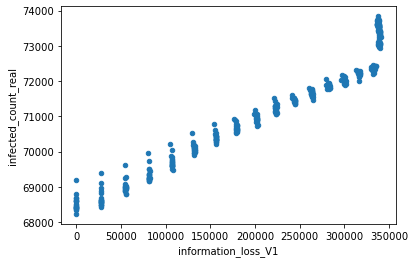

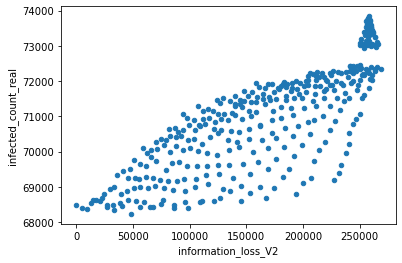

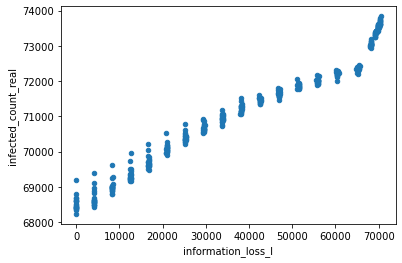

In [250]:
#print(df_graph_low)
df_graph_low.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_I', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_I', y='infected_count_real')

In [238]:
def fun(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print(x[j], y[i])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'infected_count_real']
            arr[i].append(item)
            #print(arr[i])
    return arr

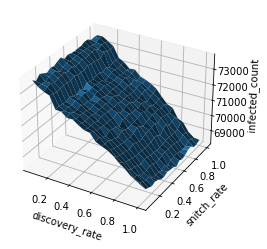

In [239]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun(x, y))
           
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.plot_surface(X, Y, Z)
    

plt.show()

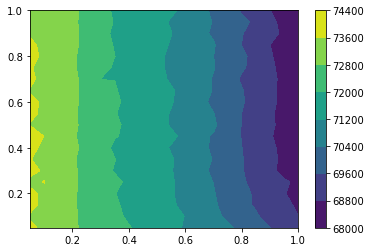

In [179]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

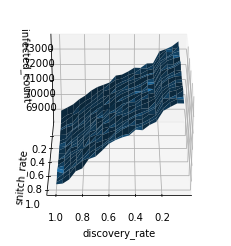

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 90)
plt.show()

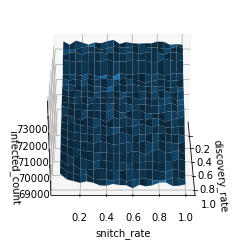

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 0)
plt.show()

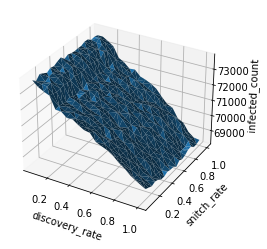

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.infected_count_real, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
plt.show()

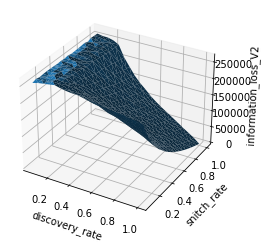

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
plt.show()

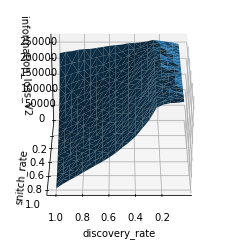

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 90)
plt.show()

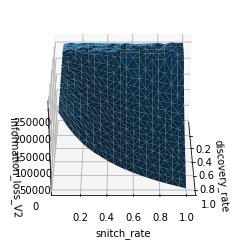

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 0)
plt.show()

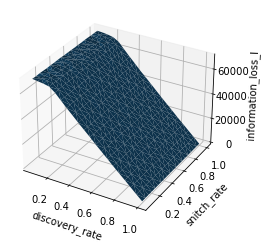

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_I, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_I')
plt.show()

In [240]:
def fun_I(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'information_loss_V2']
            arr[i].append(item)
            #print(arr[i])
    return arr

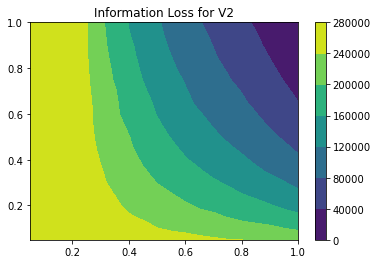

In [247]:
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun_I(x, y))

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.title("Information Loss for V2")
plt.show()

In [196]:
G = load_graph("montgomery")

I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "z6.json", 'r') as infile:
    
    j = json.load(infile)
    (S, I, R) = (j["S"], j["I"], j["R"])
    early_i = j["early_infected"]
    middle_i = j["middle_infected"]
    late_i = j["late_infected"]
    print(len(set(S).union(set(I)).union(set(R))))
    
state = SimulationState(G, (S, I, R), (S, I, R), 800, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0),0, 1, 0, 1, 1)

75457


In [184]:
print(len(state.SIR_known.V1))
print(len(state.SIR_known.V2))
print(len(state.SIR_known.SIR[1]))

4942
31620
369


In [112]:
G = load_graph("montgomery")
infected_size = 10
G_node = len(G.nodes)
nodeList = list(G.nodes)
I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 700, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)

In [197]:
'''infections = []
total = []
total = []
early_i = []
middle_i = []
late_i = []
early_t = []
middle_t = []
late_t=[]'''
step = 0
previous_time = True
next_time = True
while(len(state.SIR_real.SIR[1]) != 0):
    
    if(previous_time!=next_time):
        print("Happened")
        state.budget = 500
        #(q0, q1, q2) = (state.SIR_real.quarantined[0], state.SIR_real.quarantined[1], state.SIR_real.quarantined[2])
        #(S, I, R) = (list(set(state.SIR_real.SIR[0]).union(set(q0))), list(set(state.SIR_real.SIR[1]).union(set(q1))), 
                     #list(set(state.SIR_real.SIR[2]).union(set(q2))))
        #state = SimulationState(G, state.SIR_real.SIR, state.SIR_known.SIR, 500, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)
        #state.SIR_real.quarantined = (q0, q1, q2)
        #state.SIR_known.quarantined = (q0, q1, q2)
        #print(len(set(state.SIR_real.SIR[0]).union(set(state.SIR_real.SIR[1])).union(set(state.SIR_real.SIR[2]))))
    previous_time = next_time
    
    to_quarantine = DegGreedy(state)
    #print(to_quarantine)
    state.step(to_quarantine)
    step+=1
    
    if(state.SIR_real.time_stage == 0):
        next_time = True
        early_i.append(len(state.SIR_real.SIR[1]))
        early_t.append(len(state.SIR_real.SIR[2]))
    elif (state.SIR_real.time_stage == 1):
        next_time = False
        middle_i.append(len(state.SIR_real.SIR[1]))
        middle_t.append(len(state.SIR_real.SIR[2]))
    else:
        next_time = False
        late_i.append(len(state.SIR_real.SIR[1]))
        late_t.append(len(state.SIR_real.SIR[2]))
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    #print(state.SIR_real.time_stage)
    #if (step >= 6):
    #    to_quarantine = DegGreedy(state)
    #    state.step(to_quarantine)
    #step += 1
    #state.step(set())
infections.append(0)
#late_i.append(len(state.SIR_real.SIR[1]))

Happened


In [96]:
late_i.append(len(state.SIR_real.SIR[1]))
dictD = {}
dictD["S"] = state.SIR_real.SIR[0]
dictD["I"] = state.SIR_real.SIR[1]
dictD["R"] = state.SIR_real.SIR[2]
dictD["early_infected"] = early_i
dictD["middle_infected"] = middle_i
dictD["late_infected"] = late_i
dictD["time_stage"] = state.SIR_real.time_stage
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"z20.json", 'w') as outfile:
    json.dump(dictD, outfile)

In [141]:
print(len(G.nodes))

75457


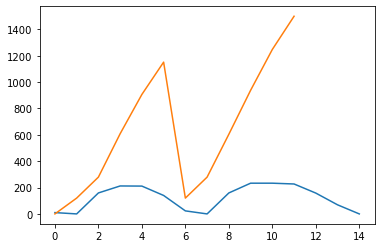

In [111]:
plt.plot(infections)
plt.plot(total)

9 14 0


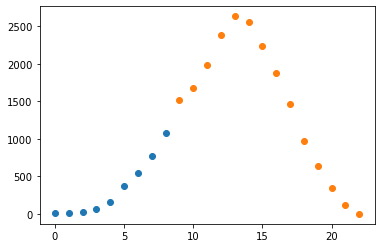

In [195]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))
#print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

26 1 0


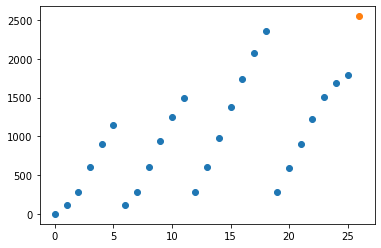

In [118]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
#print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

2 3 11


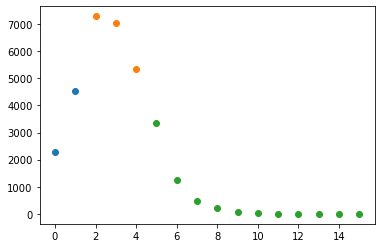

In [130]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))


2 3 10
(0.1, 0.075, 0.05) (0.1, 0.35, 1.0)


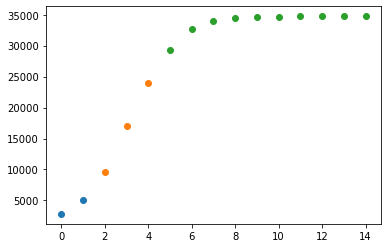

In [131]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.35, 1.0))

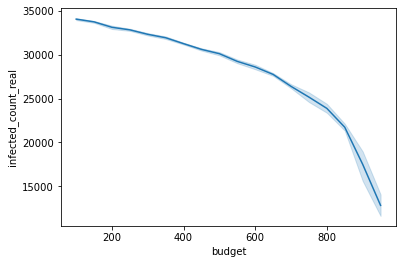

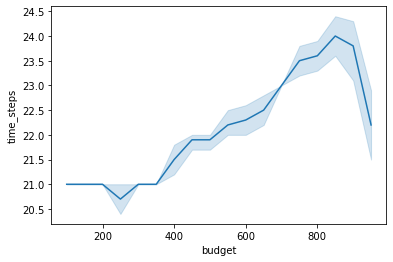

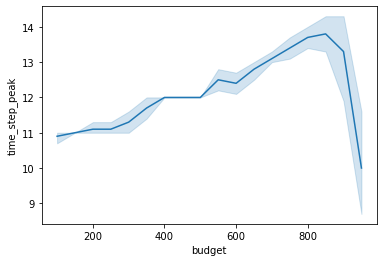

In [215]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_QD46p" / "results.csv")
df1 = pd.read_csv(PROJECT_ROOT / "output" / "run_W6kTG" / "results.csv")
df = pd.concat([df, df1]).reset_index(drop=True)
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "budget", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "budget", y ="time_step_peak")
plt.show()

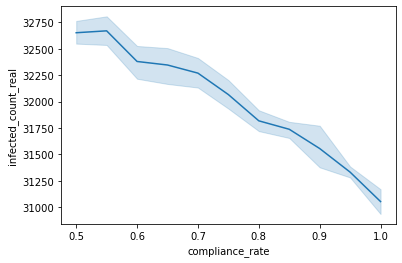

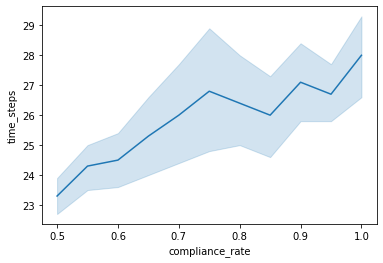

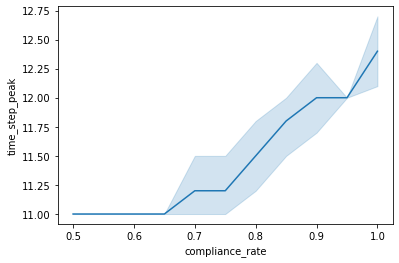

In [216]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_YtbQv" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "compliance_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "compliance_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "compliance_rate", y ="time_step_peak")
plt.show()

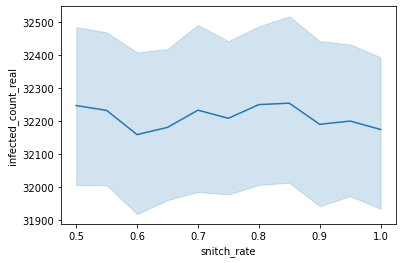

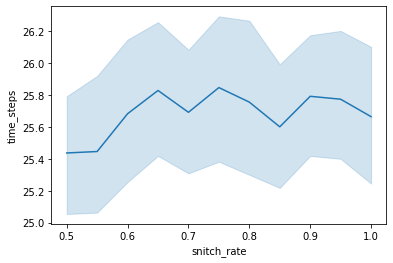

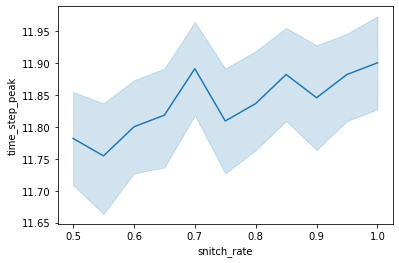

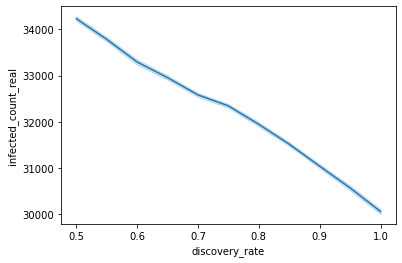

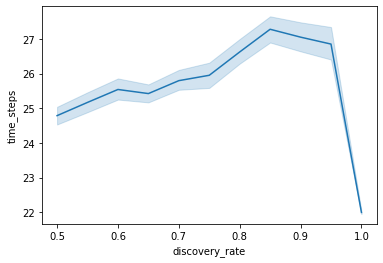

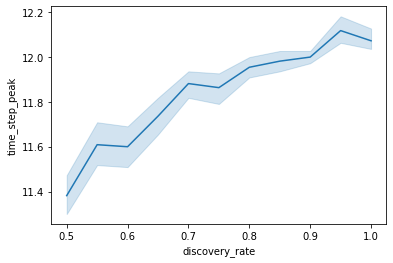

In [220]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_5XhEG" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: x.index(max(x)))
import seaborn as sns
sns.lineplot(data=df, x = "snitch_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "snitch_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "snitch_rate", y ="time_step_peak")
plt.show()

sns.lineplot(data=df, x = "discovery_rate", y = "infected_count_real")
plt.show()
sns.lineplot(data=df, x = "discovery_rate", y ="time_steps" )
plt.show()
sns.lineplot(data=df, x = "discovery_rate", y ="time_step_peak")
plt.show()

In [396]:
G = load_graph("montgomery")
infected_size = 10
G_node = len(G.nodes)
nodeList = list(G.nodes)
I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 500, (0.10, 0.075, 0.05), (0.04, 0.10, 1.0), 0, 1, 0, 1, 1)
#state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 500, (0.10, 0.075, 0.05), (1.2, 0.2, 0), 0, 1, 0, 1, 1)

In [397]:
infections = []
total = []
total = []
early_i = []
middle_i = []
late_i = []
early_t = []
middle_t = []
late_t=[]
step = 0
previous_time = True
next_time = True
while(len(state.SIR_real.SIR[1]) != 0):
    
    #if(previous_time!=next_time):
    #    print("Happened")
    #    state.budget = 500
        #(q0, q1, q2) = (state.SIR_real.quarantined[0], state.SIR_real.quarantined[1], state.SIR_real.quarantined[2])
        #(S, I, R) = (list(set(state.SIR_real.SIR[0]).union(set(q0))), list(set(state.SIR_real.SIR[1]).union(set(q1))), 
                     #list(set(state.SIR_real.SIR[2]).union(set(q2))))
        #state = SimulationState(G, state.SIR_real.SIR, state.SIR_known.SIR, 500, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)
        #state.SIR_real.quarantined = (q0, q1, q2)
        #state.SIR_known.quarantined = (q0, q1, q2)
        #print(len(set(state.SIR_real.SIR[0]).union(set(state.SIR_real.SIR[1])).union(set(state.SIR_real.SIR[2]))))
    #previous_time = next_time
    
    print("AT TIME STAGE:" + str(state.SIR_real.time_stage))
    if (step > 5):
        to_quarantine = DegGreedy(state)
        #print(to_quarantine)
        state.step(to_quarantine)
    else:
        state.step(set())   
    step+=1
    
    if(state.SIR_real.time_stage == 0):
        next_time = True
        early_i.append(len(state.SIR_real.SIR[1]))
        early_t.append(len(state.SIR_real.SIR[2]))
    elif (state.SIR_real.time_stage == 1):
        next_time = False
        middle_i.append(len(state.SIR_real.SIR[1]))
        middle_t.append(len(state.SIR_real.SIR[2]))
    else:
        next_time = False
        late_i.append(len(state.SIR_real.SIR[1]))
        late_t.append(len(state.SIR_real.SIR[2]))
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    #print(state.SIR_real.time_stage)
    #if (step >= 6):
    #    to_quarantine = DegGreedy(state)
    #    state.step(to_quarantine)
    #step += 1
    #state.step(set())
infections.append(0)
#late_i.append(len(state.SIR_real.SIR[1]))

AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:0
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:1
AT TIME STAGE:2
AT TIME STAGE:2
AT TIME STAGE:2
AT TIME STAGE:2


8 7 5


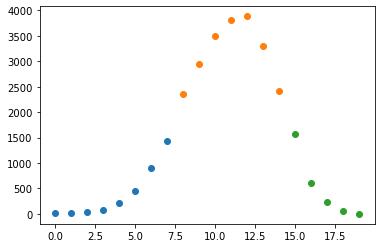

In [398]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))


8 7 5
(0.1, 0.075, 0.05) (0.1, 0.35, 1.0)


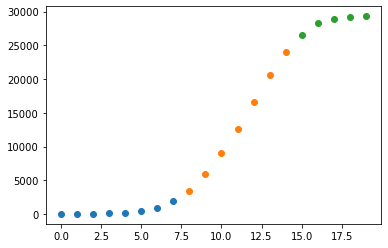

In [399]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.35, 1.0))

In [5]:
G = load_graph_hid_duration()
#print(np.mean(list(nx.get_edge_attributes(G, "duration").values())))
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1
#state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.075, 0.8, True)
#problem2: 85,000 <== 0.075 and 0.8
#problem2: 60,000 <== 0.05 and 1

In [ ]:
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05, 1, True)
counter = 0
while(len(state.SIR.I1)+len(state.SIR.I2) != 0):
    if counter >= 5:
        quarantine = DepRound(state)
        #print("we quarantine " + str(len(quarantine)))
        state.step(quarantine)
    else:
        state.step(set())
    print(len(state.SIR.R))
    counter+=1

0
10
16
52
159
463
1269
2881


In [3]:
G = load_graph_hid_duration()
#print(np.mean(list(nx.get_edge_attributes(G, "duration").values())))
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)

In [7]:
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)
infections = []
infections.append(len(state.SIR.I2))
dictD = {}
dictD["S"] = state.SIR.S
dictD["I1"] = state.SIR.I1
dictD["I2"] = state.SIR.I2
dictD["R"] = state.SIR.R
dictD["infections"] = infections
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"b0.json", 'w') as outfile:
    json.dump(dictD, outfile)
count = 0
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "b"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

In [24]:
G = load_graph_hid_duration()

with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
            j = json.load(infile)
            
            #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])
            (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
            infections = j["infections"]
state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    to_quarantine = DegGreedy(state)
    state.step(to_quarantine)
    print(len(state.SIR.I2))

317
986
1187
1645
2155
3393
4831
6300
7564
8118
7430
6083
4494
3003
1778
993
427
166
38
13
2
0


In [6]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_cwthM" / "results.csv")
df2 = pd.read_csv(PROJECT_ROOT / "output" / "run_PUwyi" / "results.csv")
#print(df["infections_step"][0].strip("[]").split(", "))
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
print("DEGREE")
print(df[df["agent"]=="Degree"]["infection_count"].mean(), df[df["agent"]=="Degree2"]["infection_count"].mean())
print("DEGGREEDY")
print(df[df["agent"]=="DegGreedy"]["infection_count"].mean(), df[df["agent"]=="DegGreedy2"]["infection_count"].mean())
print("DEPROUND")
print(df2[df2["agent"]=="DepRound"]["infection_count"].mean(), df[df["agent"]=="DepRound2"]["infection_count"].mean())

DEGREE
64441.6 62866.3
DEGGREEDY
61185.8 61069.4
DEPROUND
60986.8 61155.4


In [7]:
print("DEGREE")
print(df[df["agent"]=="Degree"]["infection_count"].std(), df[df["agent"]=="Degree2"]["infection_count"].std())
print("DEGGREEDY")
print(df[df["agent"]=="DegGreedy"]["infection_count"].std(), df[df["agent"]=="DegGreedy2"]["infection_count"].std())
print("DEPROUND")
print(df2[df2["agent"]=="DepRound"]["infection_count"].std(), df[df["agent"]=="DepRound2"]["infection_count"].std())

DEGREE
259.2524295396713 349.4268481702891
DEGGREEDY
382.0988237499706 347.8017315144426
DEPROUND
364.93554986539135 388.8882158724335


In [ ]:
df = pd.read_csv(PROJECT_ROOT / "output" / "DWkS5" / "results.csv")
import seaborn as sns
sns.lineplot(data=df["DegGreedy2"], x = "budget", y = "infected_count")
plt.show()
sns.lineplot(data=df["DepRound2"], x = "budget", y = "infected_count")
plt.show()

In [4]:
G = load_graph_hid_duration()
for i in range(10):
    print("RUN " + str(i))
    with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b5.json", 'r') as infile:
                j = json.load(infile)

                #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])
                (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
                infections = j["infections"]
    state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        to_quarantine = DepRound(state)
        state.step(to_quarantine)
        print(len(state.SIR.I2))
    print(len(state.SIR.R))

RUN 0


KeyboardInterrupt: 

In [13]:
 G = nx.Graph()
G.NAME = "montgomery"
file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
file.readline()
lines = file.readlines()
durations = []
for line in lines:
    a = line.split()
    duration = int(a[3])
    durations.append(duration)

file = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery.csv", "r")
lines = file.readlines()
nodes = {}
rev_nodes = []
edges_to_duration = {}
c_node=0

for line in lines:
    a = line.split(",")
    u = int(a[0])
    v = int(a[1])
    duration = durations[random.randint(0, len(durations)-1)]

    if u in nodes.keys():
        u = nodes[u]
    else:
        nodes[u] = c_node
        rev_nodes.append(u)
        u = c_nodel
        c_node+=1   

    if v in nodes.keys():
        v = nodes[v]
    else:
        nodes[v] = c_node
        rev_nodes.append(v)
        v = c_node
        c_node+=1

    G.add_edge(u,v)
    edges_to_duration[(u,v)] = duration
nx.set_edge_attributes(G, edges_to_duration, 'duration')

In [15]:
state = InfectionState(G, ([], [], [], []), 2000, 0.05)

(array([325010., 105159., 116128.,  48037.,  17040.,  18938.,   8093.,
          3410.,   3483.,   3369.]),
 array([  3600. ,  20519.8,  37439.6,  54359.4,  71279.2,  88199. ,
        105118.8, 122038.6, 138958.4, 155878.2, 172798. ]),
 <BarContainer object of 10 artists>)

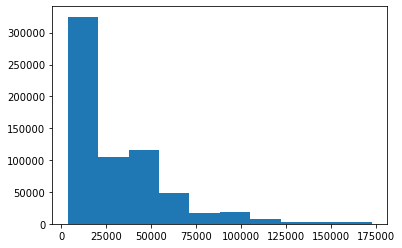

In [16]:
plt.hist(nx.get_edge_attributes(G, "duration").values())

In [19]:
visited = set()
dist = []
for node in G.nodes:
    for ngbr in G.neighbors(node):
        tup = (node, ngbr)
        if node > ngbr:
            tup = (ngbr, node)
        if not tup in visited:
            dist.append(G[node][ngbr]["compliance_transmission"][tup[0]][1])
            visited.add(tup)

(array([307200., 107561.,  86127.,  85630.,  18525.,  19438.,  12237.,
          4289.,   3948.,   3712.]),
 array([0.00598864, 0.03043728, 0.05488592, 0.07933456, 0.1037832 ,
        0.12823184, 0.15268048, 0.17712912, 0.20157776, 0.2260264 ,
        0.25047504]),
 <BarContainer object of 10 artists>)

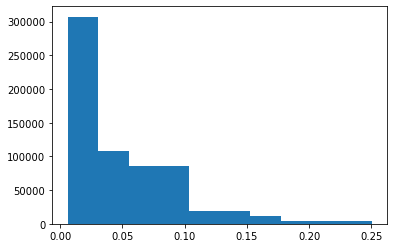

In [20]:
plt.hist(dist)

In [48]:
G = load_graph_montgomery()
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1
state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)

In [49]:
count = 0
while (len(state.SIR.I2) + len(state.SIR.I1))!=0:
    state.step(set())
    count+=1
    print(len(state.SIR.R))

0
10
10
14
14
19
23
35
52
76
114
182
298
485
799
1320
2194
3602
5695
8917
13352
18862
24659
29829
33865
36704
38565
39607
40280
40699
40924
41080
41176
41220
41257
41280
41294
41302
41307
41308
41309
41311
41312


(array([674328., 236502., 188572., 188090.,  40402.,  42466.,  27009.,
          9148.,   8505.,   8129.]),
 array([0.00599613, 0.03047111, 0.05494609, 0.07942107, 0.10389606,
        0.12837104, 0.15284602, 0.177321  , 0.20179598, 0.22627097,
        0.25074595]),
 <BarContainer object of 10 artists>)

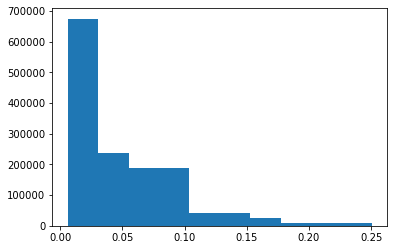

In [53]:
G2 = load_graph_hid_duration()
visited2 = set()
dist2 = []
I1 = set(random.randint(0, len(G2.nodes)-1) for i in range (0, 10))
S = set(G2.nodes)-I1
state2 = InfectionState(G2, (list(S),list(I1),[],[]), 2000, 0.05)
for node in G2.nodes:
    for ngbr in G2.neighbors(node):
        tup = (node, ngbr)
        if node > ngbr:
            tup = (ngbr, node)
        if not tup in visited2:
            dist2.append(G2[node][ngbr]["compliance_transmission"][tup[0]][1])
            visited2.add(tup)

plt.hist(dist2)

In [54]:
G2 = load_graph_montgomery()
I1 = set(random.randint(0, len(G2.nodes)-1) for i in range (0, 10))
S = set(G2.nodes)-I1
state2 = InfectionState(G2, (list(S),list(I1),[],[]), 2000, 0.05)
infections = []
infections.append(len(state2.SIR.I2))
dictD = {}
dictD["S"] = state2.SIR.S
dictD["I1"] = state2.SIR.I1
dictD["I2"] = state2.SIR.I2
dictD["R"] = state2.SIR.R
dictD["infections"] = infections
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"c0.json", 'w') as outfile:
    json.dump(dictD, outfile)
count = 0
while (len(state2.SIR.I1)+len(state2.SIR.I2) != 0):
    state2.step({})
    count+=1
    infections.append(len(state2.SIR.I2))
    dictD = {}
    dictD["S"] = state2.SIR.S
    dictD["I1"] = state2.SIR.I1
    dictD["I2"] = state2.SIR.I2
    dictD["R"] = state2.SIR.R
    dictD["infections"] = infections
    file_name = "c"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

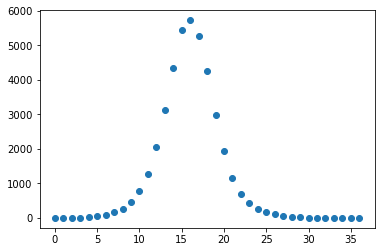

In [6]:
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"c36.json", 'r') as infile:
    j = json.load(infile)
    infections = j["infections"]
plt.scatter([i for i in range(len(infections))],infections)

<AxesSubplot:xlabel='budget', ylabel='infection_count'>

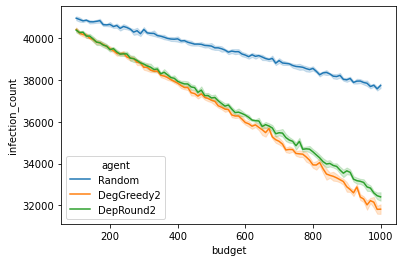

In [12]:
#THIS IS MONTOMGERY
df = pd.read_csv(PROJECT_ROOT / "output" / "run_F7epo" / "results.csv")
import seaborn as sns
#print(df[df["agent"]=="DegGreedy2"])
#sns.lineplot(data=df[df["agent"]=="DegGreedy2"], x = "budget", y = "infection_count")
#plt.show()
#sns.lineplot(data=df[df["agent"]=="DepRound2"], x = "budget", y = "infection_count")
#plt.show()
#sns.lineplot(data=df[df["agent"]=="Random"], x = "budget", y = "infection_count")
#plt.show()
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")

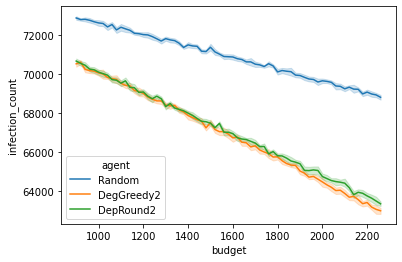

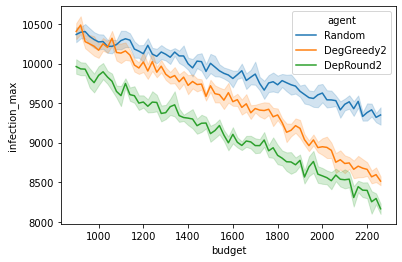

In [6]:
#THIS IS CVILLE
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Lx5nM" / "results.csv")
df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_mRkex"/"results.csv")])
import seaborn as sns
df = df[df["budget"]>= 900]
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["infection_max"] = df["infection_list"].apply(lambda x: max(x))
sns.lineplot(data = df, x = "budget", y = "infection_max", hue = "agent")
plt.show()

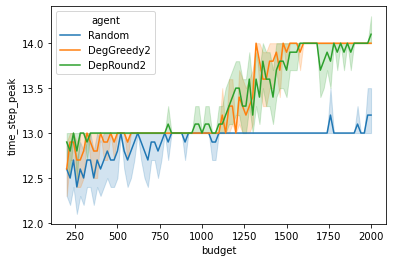

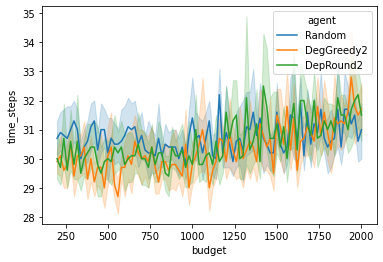

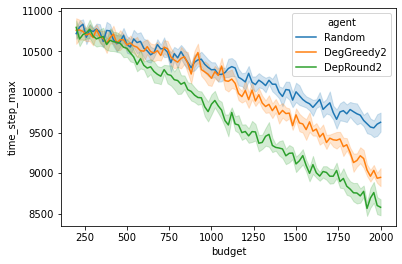

In [9]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Lx5nM" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_step_max", hue = "agent")
plt.show()

<AxesSubplot:xlabel='infoloss', ylabel='infection_count'>

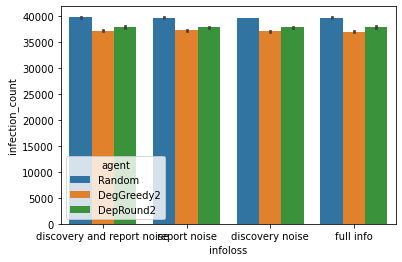

In [37]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_6t4bw" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))

def func(x):
    if (x["discovery_rate"] == 1) and (x["snitch_rate"] == 1):
        return "full info"
    elif (x["discovery_rate"] == 1):
        return "discovery noise"
    elif (x["snitch_rate"] == 1):
        return "report noise"
    else:
        return "discovery and report noise"

def func_alg(x):
    if (x["discovery_rate"] == 1) and (x["snitch_rate"] == 1):
        return "full info"
    elif (x["discovery_rate"] == 1):
        return "discovery noise"
    elif (x["snitch_rate"] == 1):
        return "report noise"
    else:
        return "discovery and report noise"
    
df["infoloss"] = df.apply(lambda row: func(row), axis = 1)
df = df[df["agent"]!="Degree2"]
#df["algo"] = df.apply(lambda row: func_alg(row), axis = 1)

import seaborn as sns

sns.barplot(data = df, x = "infoloss", y = "infection_count", hue = "agent")

In [26]:
def write_graph_montgomery():
    G = nx.Graph()
    G.NAME = "montgomery"
    file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
    file.readline()
    lines = file.readlines()
    durations = []
    for line in lines:
        a = line.split()
        duration = int(a[3])
        durations.append(duration)
    
    file = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery.csv", "r")
    lines = file.readlines()
    nodes = {}
    rev_nodes = []
    edges_to_duration = {}
    c_node=0
    duration_dict = {}
    
    outfile = open(PROJECT_ROOT / "data/graphs/montgomery/montgomery.txt", "w")
    
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = durations[random.randint(0, len(durations)-1)]
        
        if ((u,v) not in duration_dict) and ((v,u) not in duration_dict):
            duration_dict[(u,v)] = duration
        else:
            if (u,v) in duration_dict:
                duration = duration_dict[(u,v)]
            else:
                duration = duration_dict[(v,u)]
        
        outfile.write(str(u) + "," + str(v)+ "," + str(duration) + "\n")
        
        if u in nodes.keys():
            u = nodes[u]
        else:
            nodes[u] = c_node
            rev_nodes.append(u)
            u = c_node
            c_node+=1   
    
        if v in nodes.keys():
            v = nodes[v]
        else:
            nodes[v] = c_node
            rev_nodes.append(v)
            v = c_node
            c_node+=1
        
        G.add_edge(u,v)
        edges_to_duration[(u,v)] = duration
    nx.set_edge_attributes(G, edges_to_duration, 'duration')
    return G

write_graph_montgomery()

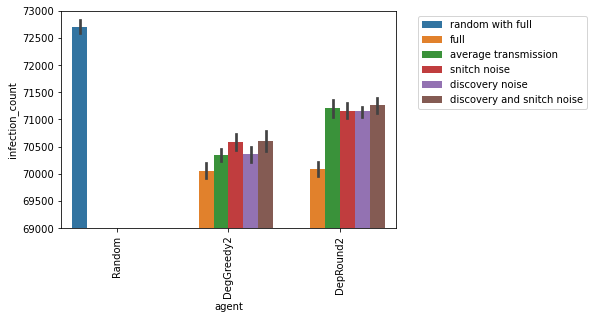

In [91]:
#run_fWHJs --> cville infoloss
#fun_nqoHM --> montgomery infoloss
df = pd.read_csv(PROJECT_ROOT / "output" / "run_fWHJs" / "results.csv")
#df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
#df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
#df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
#df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))

df_full = pd.read_csv(PROJECT_ROOT / "output" / "run_Lx5nM" / "results.csv")
df_full = df_full[ (df_full["budget"] == 1000) & ((df_full["agent"] == "DegGreedy2") | (df_full["agent"]=="DepRound2"))]

def func(x):
    if (x["agent"]=="Random"):
        if (x["discovery_rate"]==1) and (x["snitch_rate"]==1):
            return "random with full"
        else:
            return ""
    if (x["discovery_rate"] == 1) and (x["snitch_rate"] == 1):
        return "average transmission"
    elif (x["discovery_rate"] == 1):
        return "discovery noise"
    elif (x["snitch_rate"] == 1):
        return "snitch noise"
    else:
        return "discovery and snitch noise"
    
df["infoloss"] = df.apply(lambda row: func(row), axis = 1)

df_full["infoloss"] = "full"
df = pd.concat([df[df["infoloss"]=="random with full"], df_full, df[df["infoloss"]=="average transmission"], df[df["infoloss"]=="snitch noise"], df[df["infoloss"]=="discovery noise"], df[df["infoloss"]=="discovery and snitch noise"],])

#df_first = df[df["agent"]!="Random"]
import seaborn as sns

sns.barplot(data = df, x = "agent", y = "infection_count", hue = "infoloss")
#sns.barplot(data = df[(df["agent"] == "Random") & (df["infoloss"] == "random")], x = "agent", y = "infection_count", hue = "infoloss")
plt.xticks(rotation = 90)
plt.ylim(69000, 73000)
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

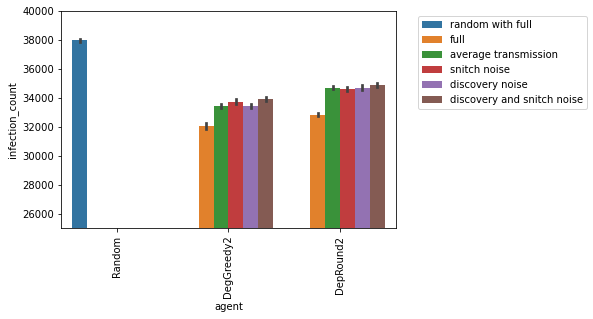

In [100]:
#run_fWHJs --> cville infoloss
#run_nqohm --> montgomery infoloss
df = pd.read_csv(PROJECT_ROOT / "output" / "run_nqohm" / "results.csv")
#df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
#df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
#df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
#df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))

df_full = pd.read_csv(PROJECT_ROOT / "output" / "run_bHVud" / "results.csv")
df_full = df_full[ (df_full["budget"] == 1000) & ((df_full["agent"] == "DegGreedy2") | (df_full["agent"]=="DepRound2"))]

def func(x):
    if (x["agent"]=="Random"):
        if (x["discovery_rate"]==1) and (x["snitch_rate"]==1):
            return "random with full"
        else:
            return ""
    if (x["discovery_rate"] == 1) and (x["snitch_rate"] == 1):
        return "average transmission"
    elif (x["discovery_rate"] == 1):
        return "discovery noise"
    elif (x["snitch_rate"] == 1):
        return "snitch noise"
    else:
        return "discovery and snitch noise"
    
df["infoloss"] = df.apply(lambda row: func(row), axis = 1)

df_full["infoloss"] = "full"
df = pd.concat([df[df["infoloss"]=="random with full"], df_full, df[df["infoloss"]=="average transmission"], df[df["infoloss"]=="snitch noise"], df[df["infoloss"]=="discovery noise"], df[df["infoloss"]=="discovery and snitch noise"],])

#df_first = df[df["agent"]!="Random"]
import seaborn as sns

sns.barplot(data = df, x = "agent", y = "infection_count", hue = "infoloss")
#sns.barplot(data = df[(df["agent"] == "Random") & (df["infoloss"] == "random")], x = "agent", y = "infection_count", hue = "infoloss")
plt.xticks(rotation = 90)
plt.ylim(25000, 40000)
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.show()

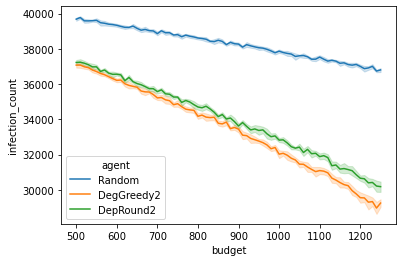

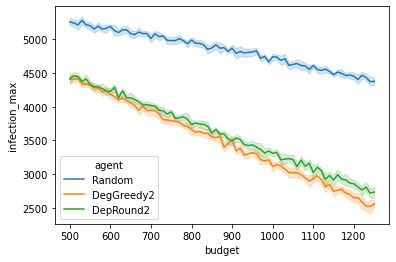

In [22]:
#THIS IS MONT
df = pd.read_csv(PROJECT_ROOT / "output" / "run_bHVud" / "results.csv")
df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_aZwFe"/"results.csv")])
import seaborn as sns
df = df[df["budget"]>= 500]
#print(df[df["agent"]=="DegGreedy2"])
#sns.lineplot(data=df[df["agent"]=="DegGreedy2"], x = "budget", y = "infection_count")
#plt.show()
#sns.lineplot(data=df[df["agent"]=="DepRound2"], x = "budget", y = "infection_count")
#plt.show()
#sns.lineplot(data=df[df["agent"]=="Random"], x = "budget", y = "infection_count")
#plt.show()
#plt.subplot(1,2,1)
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.show()
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["infection_max"] = df["infection_list"].apply(lambda x: max(x))
#sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
#plt.show()
#sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
#plt.show()
#plt.subplot(1,2,2)
sns.lineplot(data = df, x = "budget", y = "infection_max", hue = "agent")
plt.show()

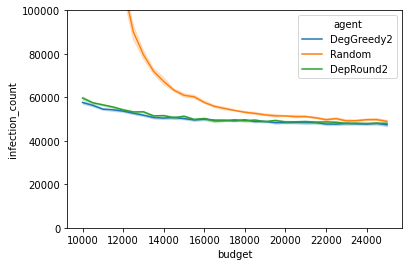

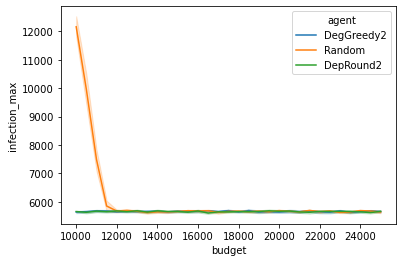

In [21]:
#THIS IS PORT
#Wg2wg --> portland first half
#4j8KT --> optimal values
df = pd.read_csv(PROJECT_ROOT / "output" / "run_Wg2wg" / "results.csv")
df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_5Xzv4"/"results.csv")])
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.ylim(0,100000)
plt.show()
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["infection_max"] = df["infection_list"].apply(lambda x: max(x))
sns.lineplot(data = df, x = "budget", y = "infection_max", hue = "agent")
plt.show()

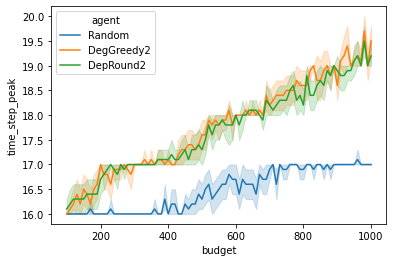

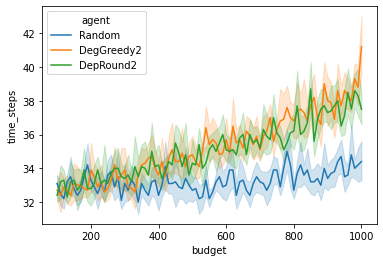

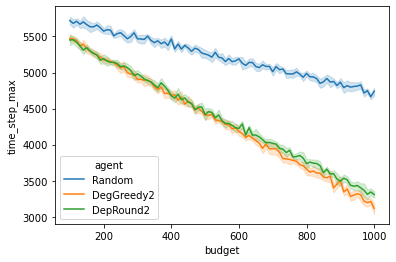

In [101]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_bHVud" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_step_max", hue = "agent")
plt.show()

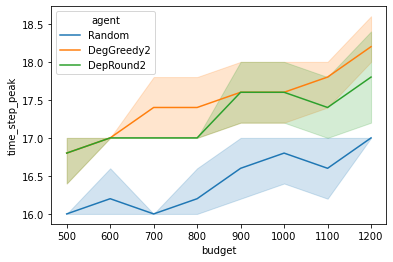

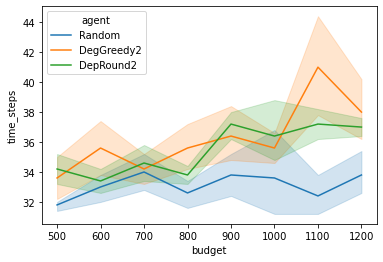

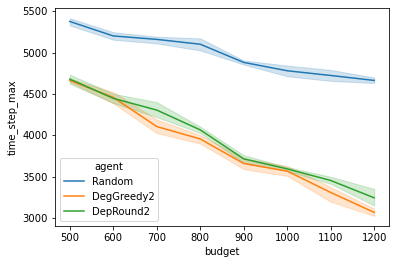

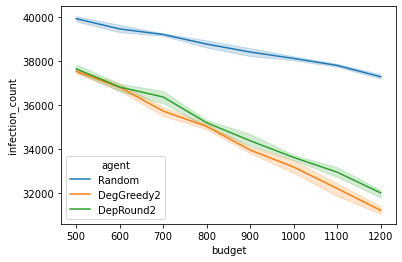

In [8]:
#MONTGOMERY
df = pd.read_csv(PROJECT_ROOT / "output" / "run_NtWJP" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_step_max", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.show()

In [ ]:
#extra budget for montgomery: aZwFe

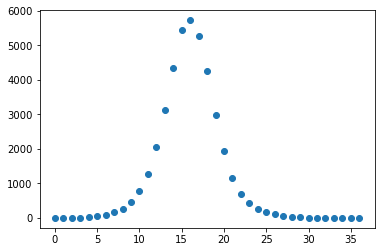

In [6]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c36.json", 'r') as infile:
    
    j = json.load(infile)

    # Make infected_queue a list of sets
    infected_queue = j["infections"]

plt.scatter([i for i in range(len(infected_queue))], infected_queue)
    

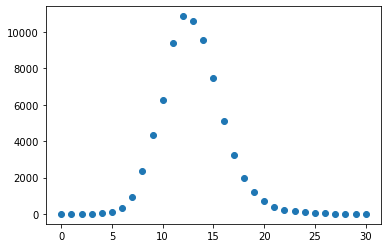

In [7]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "b30.json", 'r') as infile:
    
    j = json.load(infile)

    # Make infected_queue a list of sets
    infected_queue = j["infections"]

plt.scatter([i for i in range(len(infected_queue))], infected_queue)

In [10]:
def load_graph_portland():
    G = nx.Graph()
    G.NAME = "portland"
    
    file = open(PROJECT_ROOT / "data/raw/portland/portland.txt", "r")
    lines = file.readlines()
    nodes = {}
    rev_nodes = []
    edges_to_duration = {}
    c_node=0
    
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = int(a[2])
        
        if u in nodes.keys():
            u = nodes[u]
        else:
            nodes[u] = c_node
            rev_nodes.append(u)
            u = c_node
            c_node+=1   
    
        if v in nodes.keys():
            v = nodes[v]
        else:
            nodes[v] = c_node
            rev_nodes.append(v)
            v = c_node
            c_node+=1
        
        G.add_edge(u,v)
        edges_to_duration[(u,v)] = duration
    nx.set_edge_attributes(G, edges_to_duration, 'duration')
    return G
G = load_graph_portland()

(array([4162094., 1353106., 1484128.,  616848.,  216197.,  243164.,
         102627.,   42656.,   44059.,   42888.]),
 array([  3600. ,  20519.8,  37439.6,  54359.4,  71279.2,  88199. ,
        105118.8, 122038.6, 138958.4, 155878.2, 172798. ]),
 <BarContainer object of 10 artists>)

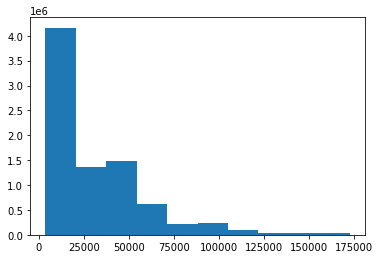

In [11]:
plt.hist(nx.get_edge_attributes(G, 'duration').values())

In [ ]:
I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1

state = InfectionState(G, (list(S),list(I1),[],[]), 2000, 0.05)
infections = []
infections.append(len(state.SIR.I2))
dictD = {}
dictD["S"] = state.SIR.S
dictD["I1"] = state.SIR.I1
dictD["I2"] = state.SIR.I2
dictD["R"] = state.SIR.R
dictD["infections"] = infections
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"d0.json", 'w') as outfile:
    json.dump(dictD, outfile)
count = 0
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "d"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

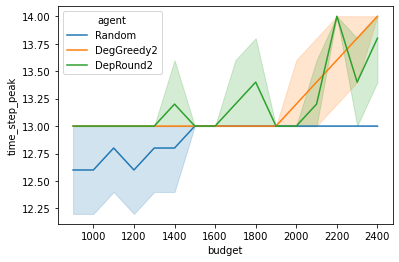

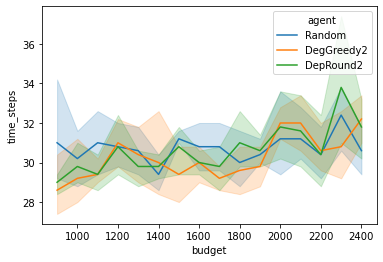

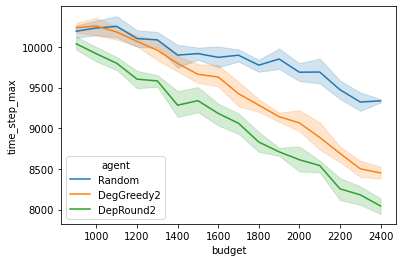

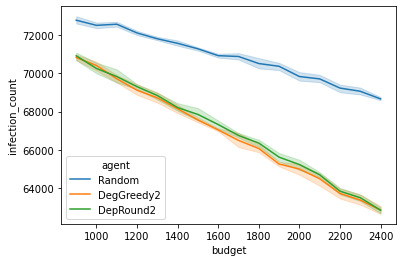

In [13]:
#CVILLE run_FucR9
df = pd.read_csv(PROJECT_ROOT / "output" / "run_FucR9" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_step_max", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.show()

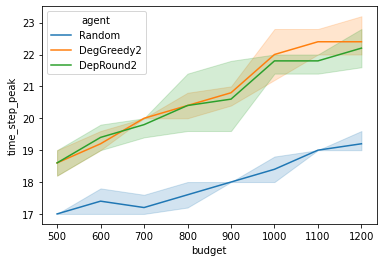

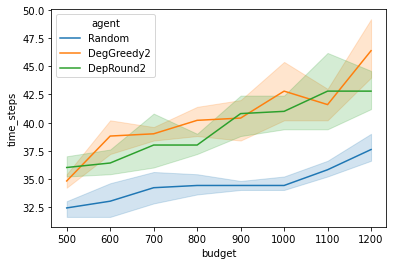

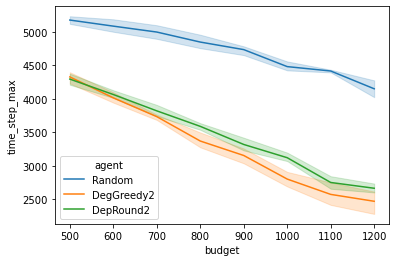

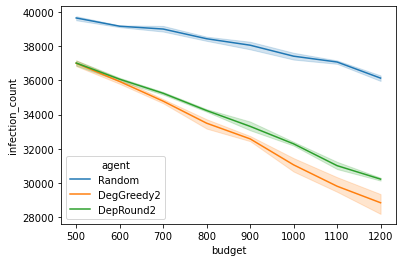

In [14]:
#Mont run_5Kgtn
df = pd.read_csv(PROJECT_ROOT / "output" / "run_5Kgtn" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["time_step_max"] = df["infection_list"].apply(lambda x: max(x))
import seaborn as sns
sns.lineplot(data = df, x = "budget", y = "time_step_peak", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_steps", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "time_step_max", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "budget", y = "infection_count", hue = "agent")
plt.show()

In [17]:
G = load_graph_portland()
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"d0.json", 'r') as infile:
    j = json.load(infile)
    (S, I1, I2, R) = (j["S"], j["I2"], j["I1"], j["R"])
    infections = j["infections"]
state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)    
count = 97
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "d"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)

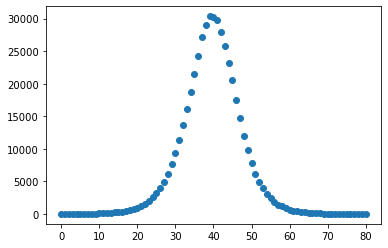

In [18]:
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "d177.json", 'r') as infile:
    
    j = json.load(infile)

    # Make infected_queue a list of sets
    infected_queue = j["infections"]

plt.scatter([i for i in range(len(infected_queue))], infected_queue)

In [21]:
def calculateExpected(state: InfectionState, quarantine):
    P,Q = pq_independent_edges(state.G, state.SIR.I2, state.V1, state.V2)
    total = 0
    for v in state.V2:
        expected = 1
        for u in (set(state.G.neighbors(v)) & state.V1):
            if u not in quarantine and v not in quarantine:
                expected *= (1-P[u]*Q[u][v])
        total += (1-P[v])*(1-expected)
    
    return total

G = load_graph_montgomery()
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"c10.json", 'r') as infile:
    j = json.load(infile)
    (S, I1, I2, R) = (j["S"], j["I2"], j["I1"], j["R"])
    infections = j["infections"]
state = InfectionState(G, (S, I1, I2, R), 2000, 0.05)    
#while (len(state.SIR.I1)+len(state.SIR.I2) != 0):

optimal_obj = MinExposedIP2(state)
optimal_obj.solve_lp()
probabilities = optimal_obj.get_variables()
rounded = D_prime(np.array(probabilities))
quarantine = set([optimal_obj.quarantine_map[k] for (k,v) in enumerate(rounded) if v==1])
print(calculateExpected(state, quarantine))

quarantine = DepRound2(state)
print(calculateExpected(state, quarantine))

953.6583806800986
957.6203855503428


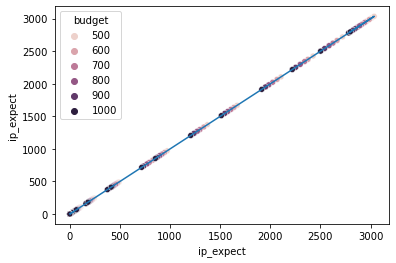

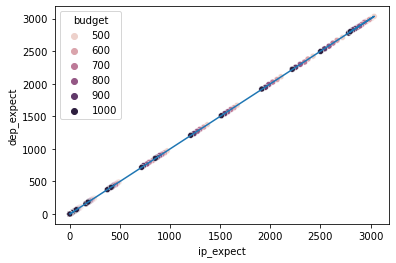

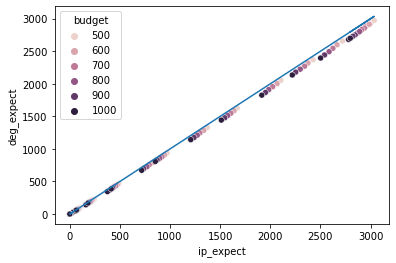

In [40]:
#Wg2wg --> portland first half
#4j8KT --> optimal values
df = pd.read_csv(PROJECT_ROOT/ "output" / "run_4j8KT" / "results.csv")
import seaborn as sns
x = df["ip_expect"].to_numpy()
y = df["ip_expect"].to_numpy()
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
sns.scatterplot(data = df, x = "ip_expect", y = "ip_expect", hue = "budget")
plt.show()
#x = df["ip_expect"].to_numpy()
#y = df["deg_expect"].to_numpy()
#m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
sns.scatterplot(data = df, x = "ip_expect", y = "dep_expect", hue = "budget")
plt.show()
#x = df["ip_expect"].to_numpy()
#y = df["deg_expect"].to_numpy()
#m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
sns.scatterplot(data = df, x = "ip_expect", y = "deg_expect", hue = "budget")
plt.show()

(array([3.3566e+04, 1.4482e+04, 1.5612e+04, 7.8270e+03, 2.8340e+03,
        9.2100e+02, 1.7600e+02, 3.3000e+01, 6.0000e+00, 1.0000e+00]),
 array([  1. ,  11.4,  21.8,  32.2,  42.6,  53. ,  63.4,  73.8,  84.2,
         94.6, 105. ]),
 <BarContainer object of 10 artists>)

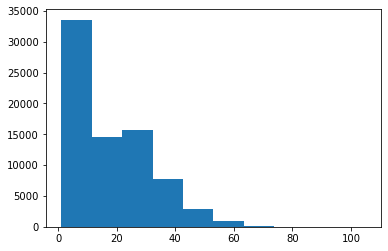

In [7]:
freq = []
G = load_graph_montgomery()
for node in G.nodes:
    freq.append(len(list(G.neighbors(node))))

plt.hist(freq)

11


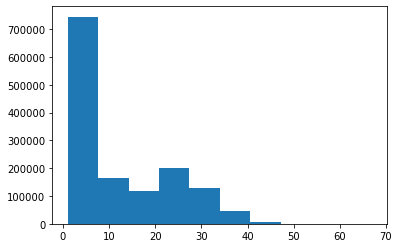

In [10]:
freq = []
G = load_graph_portland()
for node in G.nodes:
    freq.append(len(list(G.neighbors(node))))

plt.hist(freq)
print(mean(np.array(freq)))

In [15]:
letter = [i+ord('a') for i in range(0, 16)]
for i in range(16):
    G = load_graph_montgomery()

    I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
    S = set(G.nodes)-I1

    count = 0
    infections = []
    state = InfectionState(G, (list(S),list(I1),[],[]), 0, 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        state.step({})
        count+=1
        infections.append(len(state.SIR.I2))
        if (count >= 5):
            dictD = {}
            dictD["S"] = state.SIR.S
            dictD["I1"] = state.SIR.I1
            dictD["I2"] = state.SIR.I2
            dictD["R"] = state.SIR.R
            dictD["infections"] = infections
            file_name = "m"+ str(chr(letter[i])) + str(count) + ".json"
            with open(PROJECT_ROOT / "data" / "SIR_Cache"/"optimal_trials"/file_name, 'w') as outfile:
                json.dump(dictD, outfile)

In [ ]:
letter = [i+ord('a') for i in range(0, 16)]
for i in range(16):
    G = load_graph_hid_duration()

    I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
    S = set(G.nodes)-I1

    count = 0
    infections = []
    state = InfectionState(G, (list(S),list(I1),[],[]), 0, 0.05)
    while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
        state.step({})
        count+=1
        infections.append(len(state.SIR.I2))
        if (count >= 5):
            dictD = {}
            dictD["S"] = state.SIR.S
            dictD["I1"] = state.SIR.I1
            dictD["I2"] = state.SIR.I2
            dictD["R"] = state.SIR.R
            dictD["infections"] = infections
            file_name = "c"+ str(chr(letter[i])) + str(count) + ".json"
            with open(PROJECT_ROOT / "data" / "SIR_Cache"/"optimal_trials"/file_name, 'w') as outfile:
                json.dump(dictD, outfile)

In [17]:
import os

print([i for i in list(os.listdir(PROJECT_ROOT/"data"/"SIR_Cache"/"optimal_trials")) if i[0]=="m"])

['mb35.json', 'me31.json', 'mi8.json', 'mk25.json', 'mf18.json', 'mk20.json', 'mp6.json', 'mi31.json', 'ml29.json', 'ma17.json', 'ma24.json', 'mh33.json', 'mc11.json', 'mi34.json', 'mh30.json', 'ml22.json', 'mg12.json', 'mb17.json', 'mm15.json', 'mi11.json', 'ma20.json', 'ml12.json', 'md28.json', 'mg8.json', 'mj20.json', 'ma26.json', 'mm25.json', 'me21.json', 'md16.json', 'mk18.json', 'mm10.json', 'mp15.json', 'md14.json', 'mc10.json', 'mk16.json', 'ma11.json', 'mo11.json', 'mb9.json', 'mc20.json', 'mb13.json', 'mg16.json', 'me26.json', 'mc22.json', 'mp9.json', 'ma30.json', 'mc12.json', 'mg22.json', 'mc23.json', 'me16.json', 'mc8.json', 'mg9.json', 'mk30.json', 'mo5.json', 'me17.json', 'mp11.json', 'mf22.json', 'md19.json', 'md17.json', 'mb15.json', 'ma7.json', 'mo28.json', 'mo34.json', 'mm28.json', 'ma28.json', 'mf28.json', 'mf19.json', 'mn16.json', 'mc7.json', 'mp8.json', 'me24.json', 'ma9.json', 'mn19.json', 'ml25.json', 'mn7.json', 'mp18.json', 'mo12.json', 'mp14.json', 'mk19.json'

In [ ]:
import copy
def load_extra_edges(G, alpha):
    
    G = copy.deepcopy(G)
    nx.set_edge_attributes(G, {e:False for e in G.edges()}, "added")

    file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
    file.readline()
    lines = file.readlines()
    durations = []
    node_edges = {}
    taken_edges = {}
    node_list = [i for i in range(0,len(G.nodes))]
    #outfile = open(PROJECT_ROOT / "data/raw/cville/cville_extra_edges.txt", "w")
    
    for line in lines:
        a = line.split()
        duration = int(a[3])
        durations.append(duration)
    
    for node in G.nodes:
        if node not in taken_edges:
            taken_edges[node] = set()
        ngbrs = set(G.neighbors(node))
        #possible_connections = list(set(i for i in range(len(G.nodes))) - ngbrs - taken_edges[node])
        #edges = random.sample(possible_connections, k=max(0, int((alpha)*len(ngbrs))-len(taken_edges[node])))
        edges = []
        for i in range(max(0, int((alpha)*len(ngbrs))-len(taken_edges[node]))):
            e = node_list[random.randint(0, len(G.nodes)-1)]
            while e in (ngbrs|taken_edges[node]|{node}):
                e = node_list[random.randint(0, len(G.nodes)-1)]
            
            if e in taken_edges:
                taken_edges[e].add(node)
            else:
                taken_edges[e] = {node}
            edges.append(e)
        node_edges[node] = edges
    
    #print(sum(len(n) for n in node_edges.values()))
    
    for node, edges in node_edges.items():
        for v in edges:
            G.add_edge(node, v)
            G[node][v]['added'] = True
            duration = durations[random.randint(0, len(durations)-1)]
            G[node][v]["duration"] = duration
            #outfile.write(str(node) + "," + str(v)+ "," + str(duration) + "\n")
    
    return G;

G = load_graph_montgomery()
print(G.number_of_edges())
print(len(G.edges()))
print(G.size())
G2 = load_extra_edges(G, .1)
print(set(nx.get_edge_attributes(G2, 'added').values()))

648668
648668
648668


In [74]:
def store_extra_edges(G, alpha):
    
    if G.NAME == "montgomery":
        filename = "montgomery_extra_edges" + "_" + str(alpha) + ".txt"
        outfile = open(PROJECT_ROOT / "data"/"graphs"/"montgomery"/filename, "w")
    else:
        filename = "cville_extra_edges" + "_" + str(alpha) + ".txt"
        outfile = open(PROJECT_ROOT / "data"/"raw"/"cville"/filename, "w")
    
    file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
    file.readline()
    lines = file.readlines()
    
    durations = []
    taken_edges = {}
    node_list = [i for i in range(0,len(G.nodes))]
    
    for line in lines:
        a = line.split()
        duration = int(a[3])
        durations.append(duration)
    
    for node in G.nodes:
        if node not in taken_edges:
            taken_edges[node] = set()
        ngbrs = set(G.neighbors(node))
        for i in range(max(0, int((alpha)*len(ngbrs))-len(taken_edges[node]))):
            e = node_list[random.randint(0, len(G.nodes)-1)]
            while e in (ngbrs|taken_edges[node]|{node}):
                e = node_list[random.randint(0, len(G.nodes)-1)]
            
            if e in taken_edges:
                taken_edges[e].add(node)
            else:
                taken_edges[e] = {node}
            
            duration = durations[random.randint(0, len(durations)-1)]
            outfile.write(str(node) + "," + str(e)+ "," + str(duration) + "\n")

store_extra_edges(load_graph_montgomery(), 0.1)

In [79]:
import os
from os import path

def read_extra_edges(G_o, alpha):
    G = copy.deepcopy(G_o)
    print(G.NAME)
    nx.set_edge_attributes(G, {e:False for e in G.edges()}, "added")
    
    if G.NAME == "montgomery":
        filename = "montgomery_extra_edges_" + str(alpha) + ".txt"
        directory_path = PROJECT_ROOT / "data"/"graphs"/"montgomery"/filename
        if not path.exists(directory_path):
            store_extra_edges(G_o, alpha)
        infile = open(directory_path, "r")
    else:
        filename = "cville_extra_edges_" + str(alpha) + ".txt"
        directory_path = PROJECT_ROOT / "data"/"raw"/"cville"/filename
        if not path.exists(directory_path):
            store_extra_edges(G_o, alpha)
        infile = open(directory_path, "r")
    
    lines = infile.readlines()
    for line in lines:
        a = line.split(",")
        u = int(a[0])
        v = int(a[1])
        duration = int(a[2])
        G.add_edge(u, v)
        G[u][v]['duration'] = duration
        G[u][v]['added'] = True
    
    return G;

print(len(read_extra_edges(load_graph_montgomery(), 0.2).edges()))

montgomery
815412


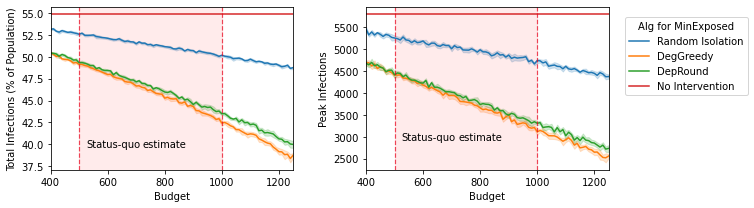

In [13]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_bHVud" / "results.csv")
df = pd.concat([df, pd.read_csv(PROJECT_ROOT/"output"/"run_aZwFe"/"results.csv")])
df = df.replace({'Random':'Random Sol', 'DepRound2':'DepRound', 'DegGreedy2':'DegGreedy'})
df = df.rename(columns={"agent":"Alg for MinExposed"})
df['infected'] = 100.0*df['infection_count']/75457

df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))

a = df.iloc[[0,1],:].copy()

df_none = pd.read_csv(PROJECT_ROOT / "output" / "run_isVZr" / "results.csv")
df_none["infection_list"] = df_none["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df_none["time_steps"] = df_none["infection_list"].apply(lambda x: len(x))
df_none["time_step_peak"] = df_none["infection_list"].apply(lambda x: x.index(max(x)))
df_none["peak"] = df_none["infection_list"].apply(lambda x: max(x))

average_nointervention_count = df_none['infection_count'].mean()
average_nointervention_peak = df_none['peak'].mean()

#average over 10 then plug in and hardcode
a.loc[[0],['budget']] = 1250
a.loc[0,'infected'] = 100.0*average_nointervention_count/75457
a.loc[1,'infected'] = 100.0*average_nointervention_count/75457
a.loc[0,'peak'] = average_nointervention_peak
a.loc[1,'peak'] = average_nointervention_peak
a.loc[[1],['Alg for MinExposed']] = 'No Intervention'
a.loc[[0],['Alg for MinExposed']] = 'No Intervention'

df = pd.concat([df,a]).reset_index()

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplots_adjust(wspace = .3)

import seaborn as sns

ax0 = sns.lineplot(data=df, x="budget", y="infected", hue="Alg for MinExposed", ax=ax[0])
ax0.get_legend().remove()
ax[0].set_xlabel("Budget")
ax[0].set_ylabel("Total Infections (% of Population)")
ax[0].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].axvline(x=1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[0].text(620, 40, 'Status-quo', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].text(800, 40, 'estimate', fontsize=10,verticalalignment='center', horizontalalignment='center')
ax[0].axvspan(500, 1000, alpha=0.08, color='red')
ax[0].set_xlim(400,1250)
#ax[0].legend(loc="upper right",title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_total.png', dpi=300)

ax1 = sns.lineplot(data=df, x="budget", y="peak", hue="Alg for MinExposed", ax=ax[1])
ax1.get_legend().remove()
ax[1].set_xlabel("Budget")
ax[1].set_ylabel("Peak Infections")
ax[1].axvline(x=500, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].axvline(x= 1000, linewidth=1.2, color=(0.9,0,0.1, 0.7),linestyle='--')
ax[1].text(620, 3000, 'Status-quo', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].text(800, 3000, 'estimate', fontsize=10, verticalalignment='center', horizontalalignment='center')
ax[1].axvspan(500, 1000, alpha=0.08, color='red')
ax[1].set_xlim(400,1250)
#ax[1].legend(loc="upper right",title="Alg for MinExposed")
#fig.savefig('../output/plots/Montgomery_vary_k_peak.png', dpi=300)

fig.legend(['Random Isolation','DegGreedy','DepRound','No Intervention'],title='Alg for MinExposed',loc="right", bbox_to_anchor=(1.1,.65), prop={'size':10})
fig.savefig("../output/plots/combined_mont.png", dpi=300, bbox_inches = 'tight')
plt.show()


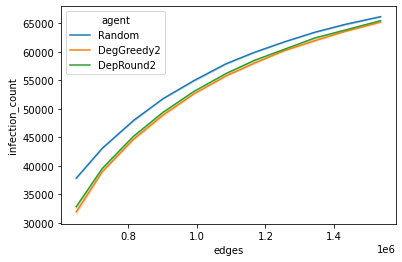

<AxesSubplot:xlabel='edges', ylabel='peak'>

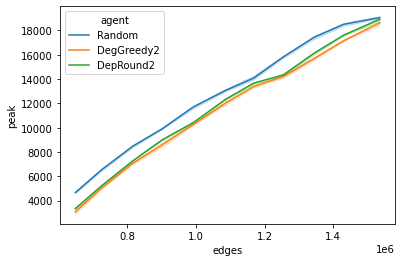

In [108]:
df = pd.read_csv(PROJECT_ROOT / "output" / "run_WSaeK" / "results.csv")
df["infection_list"] = df["infections_step"].apply(lambda x: [int(i) for i in x.strip("[]").split(", ")])
df["time_steps"] = df["infection_list"].apply(lambda x: len(x))
df["time_step_peak"] = df["infection_list"].apply(lambda x: x.index(max(x)))
df["peak"] = df["infection_list"].apply(lambda x: max(x))
df["alpha"] = df["from_cache"].apply(lambda x: x[2:x.rfind(".")])
import seaborn as sns
sns.lineplot(data = df, x = "edges", y = "infection_count", hue = "agent")
plt.show()
sns.lineplot(data = df, x = "edges", y = "peak", hue = "agent")

In [4]:
#NEW MONTOMGERY W/ ADDED EDGES: MkPFP
#MONTOMGERY no intervention W/ ADDED EGES: 9CHGN
#MONTOMGERY no intervention: isVZr

In [19]:
G = load_graph_montgomery()
G = read_extra_edges(G, 0.15)

I1 = set(random.randint(0, len(G.nodes)-1) for i in range (0, 10))
S = set(G.nodes)-I1

state = InfectionState(G, (list(S), list(I1), [], []), 2000, 0.05)   
infections = []
infections.append(len(state.SIR.I2))

count = 0
while (len(state.SIR.I1)+len(state.SIR.I2) != 0):
    state.step({})
    count+=1
    infections.append(len(state.SIR.I2))
    dictD = {}
    dictD["S"] = state.SIR.S
    dictD["I1"] = state.SIR.I1
    dictD["I2"] = state.SIR.I2
    dictD["R"] = state.SIR.R
    dictD["infections"] = infections
    file_name = "ce"+str(count) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/file_name, 'w') as outfile:
        json.dump(dictD, outfile)